In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
data = load_iris()
data.feature_names
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris = pd.DataFrame(data.data, columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
iris_species = pd.DataFrame(data.target, columns=['species'])
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   species  150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [6]:
iris.shape

(150, 4)

In [7]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# loading iris data
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
#checking for duplicates
iris[iris.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
142,5.8,2.7,5.1,1.9


In [11]:
#Checking to see if the samples are equally distributed amongst the three iris species
iris_species.value_counts()

species
2          50
1          50
0          50
dtype: int64

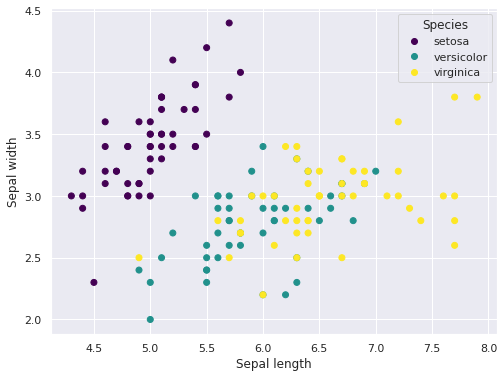

In [29]:
# Visual representation of the iris dataset, consisting of three different types of Iris species
from sklearn.decomposition import PCA

X = iris.iloc[:, :2].to_numpy()
y = iris_species.to_numpy()

plt.figure(2, figsize=(8, 6))
plt.clf()


cmap = plt.get_cmap('viridis')
norm = plt.Normalize(y.min(), y.max())
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', norm=norm)
handles = [plt.Line2D([0, 0], [0, 0], color=cmap(norm(i)), marker='o', linestyle='', label=label)
           for i, label in enumerate(['setosa', 'versicolor', 'virginica'])]
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend(handles=handles, title='Species')
plt.show()

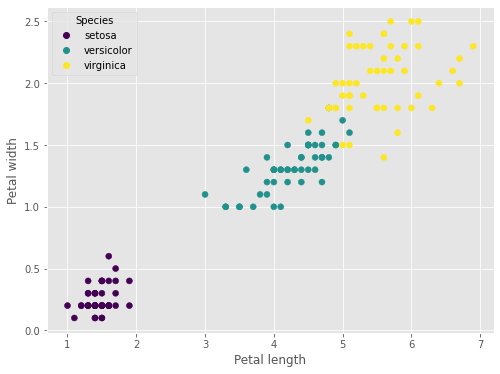

In [13]:
X = iris.iloc[:, 2:].to_numpy()

plt.figure(2, figsize=(8, 6))
plt.clf()

cmap = plt.get_cmap('viridis')
norm = plt.Normalize(y.min(), y.max())
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', norm=norm)
handles = [plt.Line2D([0, 0], [0, 0], color=cmap(norm(i)), marker='o', linestyle='', label=label)
           for i, label in enumerate(['setosa', 'versicolor', 'virginica'])]
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(handles=handles, title='Species')
plt.show()


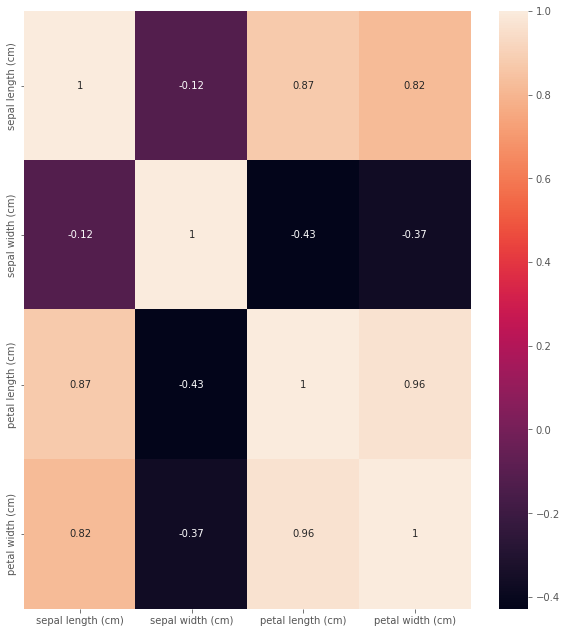

In [14]:
# Correlation Heatmap to show correlation of parameters (Sepal and Petal width and length) between each other
import seaborn as sns
plt.figure(figsize=(10,11))
sns.heatmap(iris.corr() ,annot=True)
plt.plot()
sns.set()

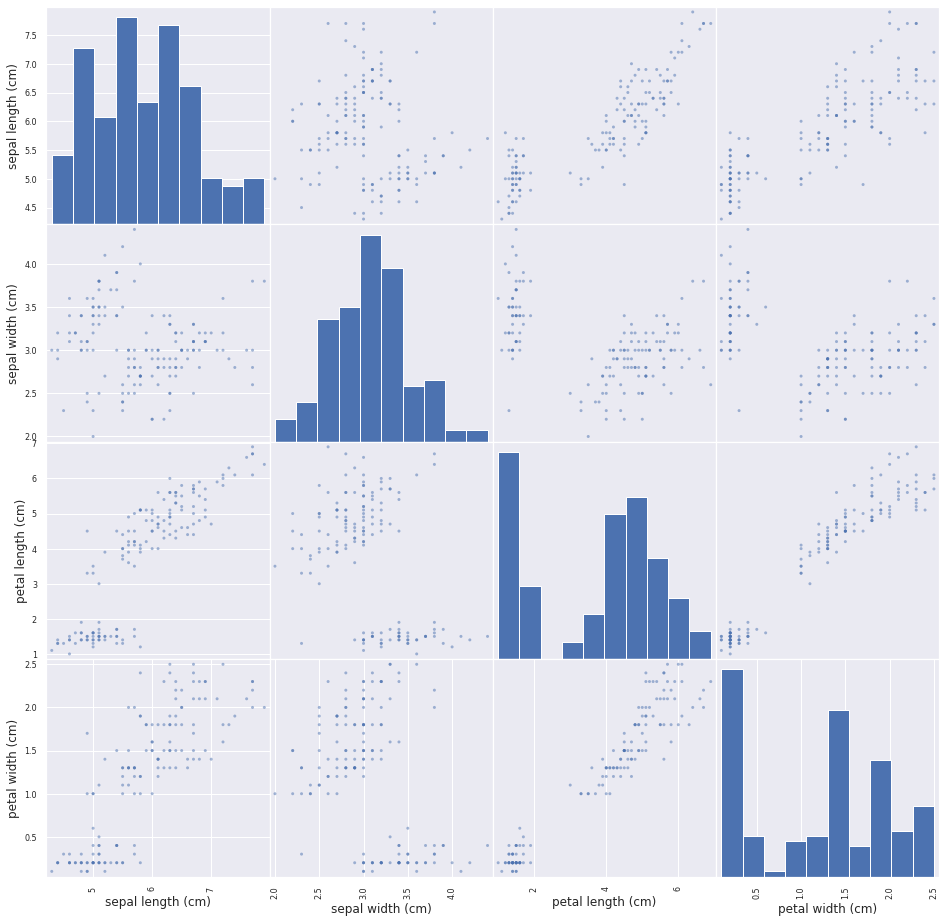

In [28]:
# Multi-variable scatter matrix to show how the values of Sepal and Petal length and width are related to each other
from pandas.plotting import scatter_matrix
a = scatter_matrix(iris,figsize=(16, 16))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (149) found smaller than n_clusters (150). Possibly due to duplicate points in X.
  


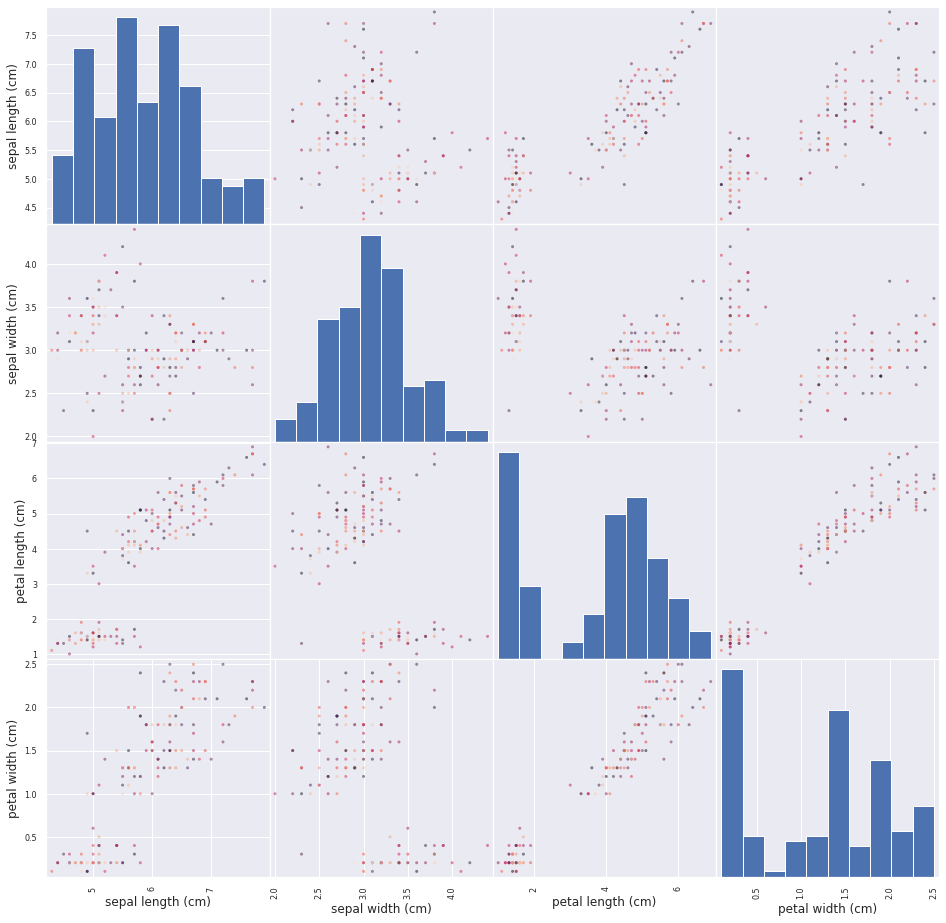

In [27]:
# Clustering was executed on the Iris data set of 150 samples. Graph portrays these small groups based on the distances between them.
%matplotlib inline
from sklearn.cluster import KMeans

num_iris_species = len(iris_species)
kmeans = KMeans(n_clusters=num_iris_species).fit(iris)
a = scatter_matrix(iris, figsize=(16, 16), c=kmeans.labels_)

explained variance ratio (first two components): [0.92461872 0.05306648]


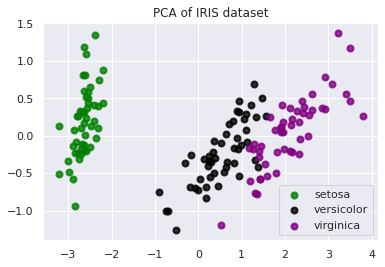

In [17]:
# PCA identifies the combination of attributes that account for the most variance in the data

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

X = iris.to_numpy()
y = iris_species.iloc[:].to_numpy().reshape(len(iris_species))

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["green", "black", "purple"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], ['setosa', 'versicolor', 'virginica']):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.show()

In [ ]:
# HyperParameters to try different values for n_neighbours automatically. 
from pandas import DataFrame
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


X = iris.iloc[:,:2]  
y = iris_species.to_numpy()

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
model = KNeighborsClassifier()

parameters = {
    "n_neighbors" : range(1, 60),
}
clf = GridSearchCV(model, parameters).fit(train_X, train_y)

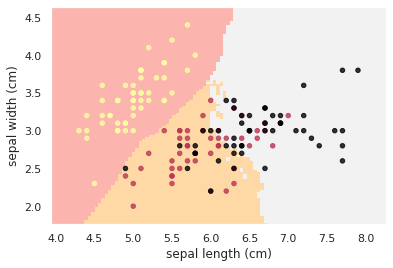

In [25]:
# HyperParameters to try different values for n_neighbours automatically. 
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel1", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="inferno_r", colorbar=False, alpha=0.8, ax=ax)

plot_knn(clf, X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


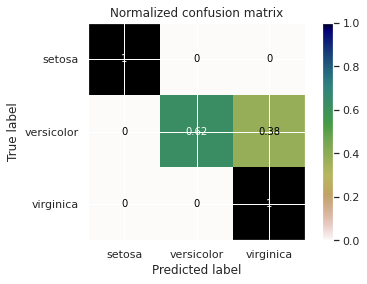

In [26]:
# Confusion matrix to visually represent actual vs. predicted values and measure the performance of the machine learning classification model.

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

X = iris
y = iris_species
class_names = ['setosa', 'versicolor', 'virginica']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.gist_earth_r,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()